In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Some configs
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 200
# plt.rcParams['font.size'] = 12
# plt.rcParams['legend.fontsize'] = 'large'
# plt.rcParams['figure.title']

In [11]:
#Load data
df = pd.read_csv('./data/Insurance.csv')

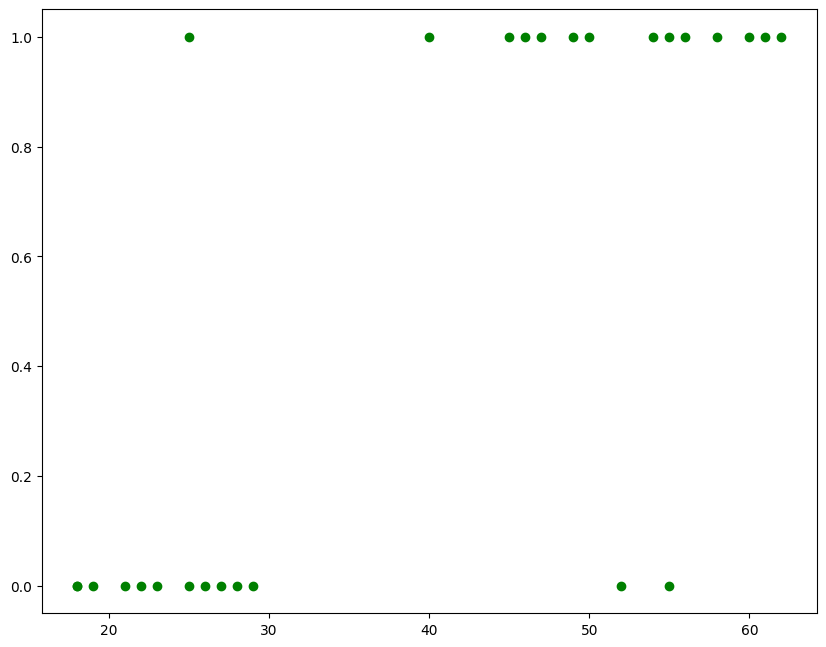

In [12]:
plt.scatter(df['age'], df['bought_insurance'], color='green', marker='o')

In [18]:
# Split train/test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.1)

In [24]:
#Crate model and fit it
from sklearn.linear_model import LogisticRegression
# model = LogisticRegression().fit(x_train, y_train)
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0 ).fit(x_train, y_train)

In [25]:
# Get results and evaluate the model
intercept = model.intercept_
coefs = model.coef_
score = model.score(x_train, y_train)
prob_matrix = model.predict_proba(x_train)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
y_train_pred = model.predict(x_train)
print(classification_report(y_train, y_train_pred))
cm = confusion_matrix(y_train, y_train_pred)

##recall: độ che phủ
##precision: độ chính xác

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.86      0.92      0.89        13

    accuracy                           0.88        24
   macro avg       0.88      0.87      0.87        24
weighted avg       0.88      0.88      0.87        24



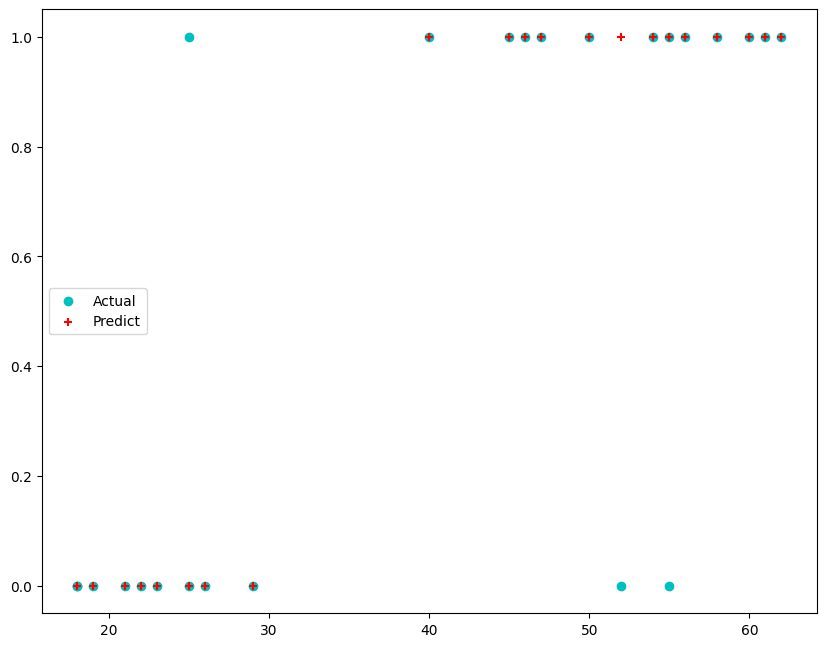

In [29]:
plt.scatter(x_train, y_train, color='c', label='Actual', marker='o')
plt.scatter(x_train, y_train_pred, color='r', label='Predict', marker='+')
plt.legend(loc='center left')

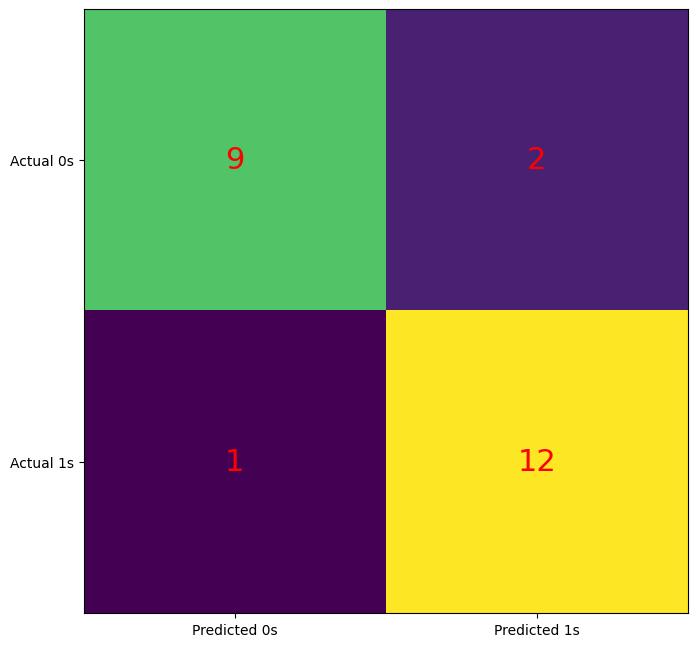

In [31]:
fig, ax = plt.subplots()
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va = 'center', color='r', fontsize=22)
plt.show()

In [34]:
# Making predictions
y_pred = model.predict(x_test)
pred_score = model.score(x_test, y_test)
pred_prob_matrix = model.predict_proba(x_test)
print(x_test)
pred_prob_matrix

# Khả năng mua BH của ng 27 là 26%, ng 49 tuổi khả năng mua là 77%...

    age
12   27
14   49
11   28


array([[0.73216945, 0.26783055],
       [0.22888405, 0.77111595],
       [0.7119217 , 0.2880783 ]])

In [36]:
#Define prediction function via Sigmoid
from com_func import sigmoid
def predicttion_function(age, inter, coef):
    z = inter + coef * age
    return sigmoid(z)

ImportError: cannot import name 'sigmoid' from 'com_func' (C:\Users\V\PycharmProjects\pythonProject1\com_func.py)

In [ ]:
# Draw sigmoid plot
plt.scatter(x_train, y_train, color='r', marker='o')
plt.scatter(df['age'], df['bought_insurance'], color='r', marker='o')
X_test = np.linspace(10,75,25)
sigs = []
for item in X_test:
    sigs.append(predicttion_function(item, intercept[0]), coefs[0][0])
plt.plot(X_test, sigs, color='g', linestyle='--')
plt.scatter(x_test, y_pred, color='b', s=100, label='Actual')
plt.scatter(x_test, y_pred, color='y', marker='x', label='')

In [ ]:
#Predict future values using prediction_function()
pred_prob = predicttion_function(56, intercept[0], coefs[0],[0])